In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_csv("/content/ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [ ]:
df.shape

(2111, 17)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Height', 'Weight', 'family_history_with_overweight',
       'FAVC', 'FCVC', 'NCP', 'CAEC', 'SMOKE', 'CH2O', 'SCC', 'FAF', 'TUE',
       'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')

In [ ]:
df.dtypes

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object

In [ ]:
df.describe()

,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,24.312600,1.701677,86.586058,2.419043,2.685628,2.008011,1.010298,0.657866
std,6.345968,0.093305,26.191172,0.533927,0.778039,0.612953,0.850592,0.608927
min,14.000000,1.450000,39.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,19.947192,1.630000,65.473343,2.000000,2.658738,1.584812,0.124505,0.000000
50%,22.777890,1.700499,83.000000,2.385502,3.000000,2.000000,1.000000,0.625350
75%,26.000000,1.768464,107.430682,3.000000,3.000000,2.477420,1.666678,1.000000
max,61.000000,1.980000,173.000000,3.000000,4.000000,3.000000,3.000000,2.000000


In [ ]:
df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
df['CAEC'].value_counts()

Sometimes     1765
Frequently     242
Always          53
no              51
Name: CAEC, dtype: int64

In [ ]:
df['CALC'].value_counts()

Sometimes     1401
no             639
Frequently      70
Always           1
Name: CALC, dtype: int64

In [ ]:
df['MTRANS'].value_counts()

Public_Transportation    1580
Automobile                457
Walking                    56
Motorbike                  11
Bike                        7
Name: MTRANS, dtype: int64

<Axes: >

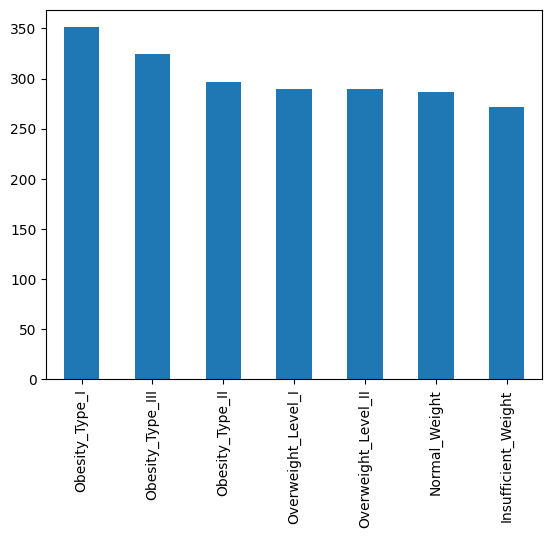

In [ ]:
df['NObeyesdad'].value_counts().plot(kind = 'bar')

In [ ]:
df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

In [ ]:
def map_obesity(x):
  if x == 'Obesity_Type_I':
    return 0
  elif x == 'Obesity_Type_II':
    return 1
  elif x == 'Obesity_Type_III':
    return 2
  elif x == 'Overweight_Level_I':
    return 3
  elif x == 'Overweight_Level_II':
    return 4
  elif x == 'Insufficient_Weight':
    return 5
  else:
    return 6

In [ ]:
df['NObeyesdad'] = df['NObeyesdad'].apply(map_obesity)

In [ ]:
df['NObeyesdad']

0       6
1       6
2       6
3       3
4       4
       ..
2106    2
2107    2
2108    2
2109    2
2110    2
Name: NObeyesdad, Length: 2111, dtype: int64

OBSERVATION: Balanced Dataset

In [ ]:
categorical_features = []
numeric_features = []
for feature in df:
  if df[feature].dtype == object:
    categorical_features.append(feature)
  else:
    numeric_features.append(feature)

In [ ]:
print(categorical_features)

['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


In [ ]:
print(numeric_features)

['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 'NObeyesdad']


In [ ]:
df.iloc[:,:-1]

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,Female,21.000000,1.620000,64.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,0.000000,1.000000,no,Public_Transportation
1,Female,21.000000,1.520000,56.000000,yes,no,3.0,3.0,Sometimes,yes,3.000000,yes,3.000000,0.000000,Sometimes,Public_Transportation
2,Male,23.000000,1.800000,77.000000,yes,no,2.0,3.0,Sometimes,no,2.000000,no,2.000000,1.000000,Frequently,Public_Transportation
3,Male,27.000000,1.800000,87.000000,no,no,3.0,3.0,Sometimes,no,2.000000,no,2.000000,0.000000,Frequently,Walking
4,Male,22.000000,1.780000,89.800000,no,no,2.0,1.0,Sometimes,no,2.000000,no,0.000000,0.000000,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.976842,1.710730,131.408528,yes,yes,3.0,3.0,Sometimes,no,1.728139,no,1.676269,0.906247,Sometimes,Public_Transportation
2107,Female,21.982942,1.748584,133.742943,yes,yes,3.0,3.0,Sometimes,no,2.005130,no,1.341390,0.599270,Sometimes,Public_Transportation
2108,Female,22.524036,1.752206,133.689352,yes,yes,3.0,3.0,Sometimes,no,2.054193,no,1.414209,0.646288,Sometimes,Public_Transportation
2109,Female,24.361936,1.739450,133.346641,yes,yes,3.0,3.0,Sometimes,no,2.852339,no,1.139107,0.586035,Sometimes,Public_Transportation


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,:-1],df.iloc[:,-1:], test_size=0.2, random_state=42)

In [ ]:
X_train

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
162,Female,21.000000,1.630000,60.000000,yes,yes,3.000000,3.000000,Always,yes,2.000000,no,2.000000,0.000000,Sometimes,Public_Transportation
2001,Female,20.924956,1.752531,133.618706,yes,yes,3.000000,3.000000,Sometimes,no,2.887659,no,1.480919,0.779641,Sometimes,Public_Transportation
1435,Female,22.899740,1.661715,82.595793,yes,yes,1.203754,1.355354,Sometimes,no,2.765593,no,0.128342,1.659476,Sometimes,Public_Transportation
649,Female,21.837996,1.588046,44.236067,no,no,3.000000,1.696080,Frequently,no,2.550307,no,1.098862,0.000000,no,Public_Transportation
1280,Male,25.994746,1.811602,106.042142,yes,yes,3.000000,3.000000,Sometimes,no,2.858171,no,1.813318,0.680215,Sometimes,Public_Transportation
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,Male,32.290160,1.754956,120.098812,yes,yes,2.967300,3.000000,Sometimes,no,2.530035,no,0.955317,1.339232,Sometimes,Automobile
1095,Male,23.000000,1.718981,81.669950,yes,yes,2.000000,1.729553,Sometimes,no,1.400247,no,0.887923,1.011983,Sometimes,Public_Transportation
1130,Female,22.989846,1.650000,80.000000,yes,yes,2.000000,3.000000,Sometimes,no,2.000000,no,0.146919,2.000000,no,Public_Transportation
1294,Female,23.000000,1.628168,84.497980,yes,yes,2.058687,2.962004,Sometimes,no,2.010596,no,0.851059,0.630866,no,Public_Transportation


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
transformer = ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(sparse=False),categorical_features)
],remainder = 'passthrough')

In [ ]:
X_train = transformer.fit_transform(X_train)
X_test = transformer.transform(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train

array([[1.      , 0.      , 0.      , ..., 2.      , 2.      , 0.      ],
       [1.      , 0.      , 0.      , ..., 2.887659, 1.480919, 0.779641],
       [1.      , 0.      , 0.      , ..., 2.765593, 0.128342, 1.659476],
       ...,
       [1.      , 0.      , 0.      , ..., 2.      , 0.146919, 2.      ],
       [1.      , 0.      , 0.      , ..., 2.010596, 0.851059, 0.630866],
       [0.      , 1.      , 0.      , ..., 3.      , 2.433918, 0.561602]])

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
xgb.score(X_test,y_test)

0.950354609929078

In [ ]:
from sklearn.metrics import accuracy_score,f1_score
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)
print("train accuracy : ",accuracy_score(y_train,y_train_pred))
print("test accuracy : ",accuracy_score(y_test,y_test_pred))
print("train f1 : ",f1_score(y_train,y_train_pred,average=None))
print("test f1 : ",f1_score(y_test,y_test_pred,average=None))

train accuracy :  1.0
test accuracy :  0.950354609929078
train f1 :  [1. 1. 1. 1. 1. 1. 1.]
test f1 :  [0.96103896 0.96551724 1.         0.8907563  0.98989899 0.96551724
 0.87931034]
